<a href="https://colab.research.google.com/github/nishitha190/AIML-ASSIGNMENTS-IIIT-/blob/main/Copy_of_STP_Module_3_Lab_1_Understanding_Distance_metrics_and_Introduction_to_KNN_By_Om_Kathalkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE 3: CLASSIFICATION-1
### LAB-1 : Understanding Distance metrics and Introduction to KNN

---

## **SECTION - 1 : Distance metrics**

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

### **Euclidean Distance**

There is more than one way to define distance. The most familiar distance metric is probably _Euclidean distance_, which is the straight-line distance between the two points. The formula for calculating this distance is a generalization of the Pythagorean theorem:

$$ d({\bf x}, {\bf x'}) = \sqrt{\sum_{j=1}^D (x_j - x'_j)^2} $$
  
    
                            

                              
                              

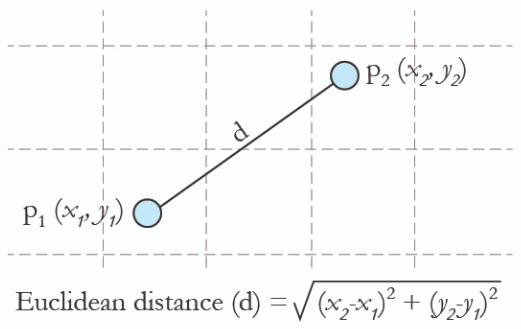

[Image Source](https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.tutorialexample.com%2Fwp-content%2Fuploads%2F2020%2F05%2FEuclidean-distance-in-tensorflow.png&imgrefurl=https%3A%2F%2Fwww.tutorialexample.com%2Fcalculate-euclidean-distance-in-tensorflow-a-step-guide-tensorflow-tutorial%2F&tbnid=xB3LUnhOEpdklM&vet=12ahUKEwj_qrjI3dfxAhXTJCsKHX_7DDgQMygDegUIARDLAQ..i&docid=AIcC7trk2GUB6M&w=521&h=329&q=euclidean%20distance&ved=2ahUKEwj_qrjI3dfxAhXTJCsKHX_7DDgQMygDegUIARDLAQ)

In [2]:
# Simple 2D example
x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [3]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [5]:
## TASK-1
## Write a vectorized version of computing Euclidean distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'euclidean_dist'
## Verify this result with what you saw above

# Write your code below and uncomment the lines below in order to run the cell.

euclidean_dist =np.sqrt(np.sum((x_1 - x_2)**2))
print(euclidean_dist)

# print(euclidean_dist)

5.0


In [7]:
#@title Answer to Task-1
# Answer:
euclidean_dist = np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)

5.0


In [6]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [8]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [9]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Manhattan Distance**

Euclidean distance is not the only way to measure how far apart two points are. [**Manhattan distance**](https://en.wikipedia.org/wiki/Taxicab_geometry) (also called _taxicab distance_) measures the distance a taxicab in would have to drive to travel from A to B. Taxicabs cannot travel in a straight line because they have to follow the street grid. But there are multiple paths along the street grid that all have exactly the same length; the Manhattan distance is the length of any one of these shortest paths.
The formula for Manhattan distance is as follows:
$$ d({\bf x}, {\bf x'}) = \sum_{j=1}^D |x_j - x'_j| $$  
  
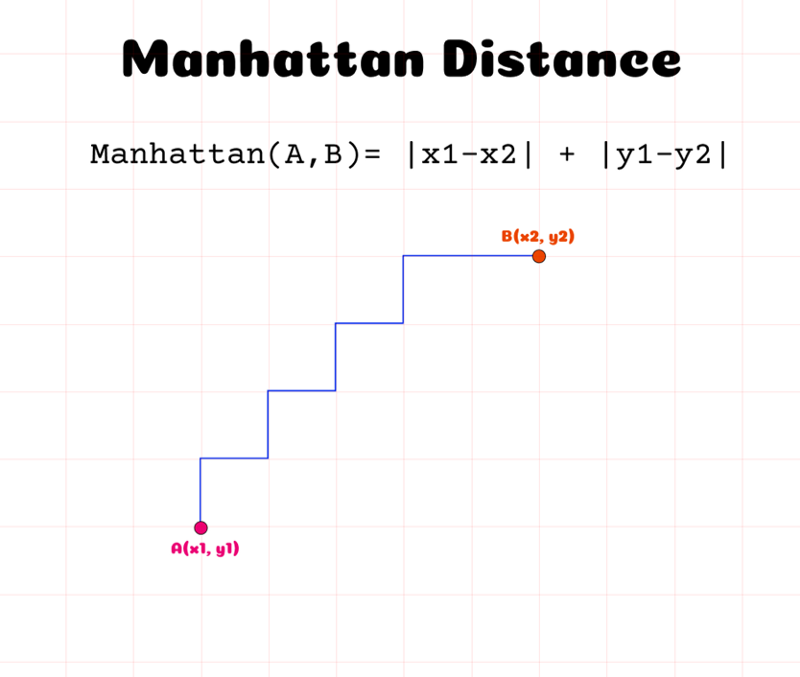  


[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Faigents.co%2Fblog%2Fpublication%2Fdistance-metrics-for-machine-learning&psig=AOvVaw3oUdVhaRKBIADWyXWDUoLZ&ust=1625576456552000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCOC6pa3-y_ECFQAAAAAdAAAAABAD)

In [11]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [13]:
## TASK-2
## Write a vectorized version of computing Manhattan distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'manhattan_dist'
## Verify your result with the output of the scipy function in the previous cell.

# Write your code below and uncomment the lines below in order to run the cell.

manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

7


In [15]:
#@title Answer to Task-2
# Answer:
manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

7


In [14]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [16]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Minkowski Distance**

Minkowski distance is a generalized form of Euclidean and Manhattan distance. We can raise the absolute difference to any power $p$ and take the $p$th root. The formula for Minkowski distance is:
$$ d({\bf x}, {\bf x'}) = \left(\sum_{j=1}^D |x_j - x'_j|^p\right)^{1/p}. $$
Manhattan distance and Euclidean distance are special cases of Minkowski distance for $p=1$ and $p=2$, respectively.

In [18]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  4.497941445275415


In [19]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  7.0
Minkowski distance when p=2 is  5.0


### **Hamming Distance**

Hamming distance is slightly different from the distance metrics previously discussed, and is applied in certain kinds of machine learning problems. It measures similarity between two strings of the same length.
The Hamming Distance between two strings of **the same length** is the number of positions at which the corresponding characters are different.

In [20]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

# Note that the answer will be 7, as except for the last two letters ('a' and 'n'), all
# the other corresponding letters in the two strings are different.

7.0


### **Cosine Similarity**

This is a measure of "similarity" (note that this is different from distance) between two non-zero vectors of an inner product space. Range: [-1,1].  
$$ \text{cosine similarity}(A,B)  = \frac{A \cdot B}{\lVert A \rVert \lVert B \rVert}$$
  


In [21]:
from numpy.linalg import norm

# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


### **Chebyshev Distance**

Chebyshev distance is also called the L∞ metric. It is a metric defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension. Simply explained, it is the maximum distance along one axis.  
$$ d_{chebyshev}(x,y) = \max_{i}(\lvert x_i - y_i \rvert) $$

In [22]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

4


### **Jaccard Distance**
The Jaccard distance is a metric that measures dissimilarity between sample sets.  
$$ \text{Jaccard Index ie, } J(A,B) = \frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert}$$
$$ \text{Jaccard Distance ie, } d_{J}(A,B) = 1 - J(A,B) = 1 -\frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert}$$

In [23]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [24]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


### Haversine distance

The Haversine formula calculates the shortest distance between two points on a sphere using their latitudes and longitudes measured along the surface. It is important for use in navigation.

In [25]:
def haversine(coord1, coord2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)


    print(f"Distance: " + str(km) + " km")

In [26]:
haversine([-0.116773, 51.510357], [-77.009003, 38.889931])

Distance: 5897.658 km


### **How to decide the appropriate distance metric ?**

1. **Euclidean distance**: The most widely used metric in KNN classification problems, since it calculates the straight line distance between two points.  

2. **Manhattan distance**: In some cases, Manhattan distance maybe preferable over Euclidean distances. For eg: For data with high dimensionality, Manhattan distance maybe more useful. When Euclidean distance is defined using many coordinates, there is not a lot of difference in the distances between different pairs of points. This is due to the **Curse of Dimensionality**, ie, "*when the dimensionality increases, the volume of the space increases so fast that the available data become sparse*".  
Manhattan distance is a more appropriate metric to use if the data is, for example, in the form of a grid. For instance, if the data consists of several houses that are arranged in the form of a grid and connected by roads, Euclidean distance is not an appropriate indicator of the distance between the houses, as in real-life, one would take the roads to travel between two points, thus making Manhattan distance a more suitable metric.  

3. **Cosine Similarity**: Cosine similarity is commonly used in text-analytics and document comparison problems. It is also used in collaborative filtering-based recommendation systems.  It is used when the magnitude of the vectors is not of importance.

4. **Hamming Distance**: It is commonly used to measure the distance between categorical variables.  

5. **Jaccard Index**: The Jaccard index is often used in applications where binary data is used. It can also be used in text similarity analysis to measure how much word choice overlap there is between documents

## **SECTION - 2 : KNN**

### What is KNN ?

K-NN (K- Nearest Neighbours) is a classification technique where the output is a class membership.  
An object is classified by a **plurality vote of its neighbors**, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.  

### What is so unique about KNN ?  
First off, KNN is a **supervised learning** algorithm, ie, the idea is to learn a function that can map an input to an output given some example pairs.  

It is a **non-parametric** algorithm, since it doesn't assume anything about the form of the mapping function, which makes it very flexible to use. Certain algorithms are parametric (such as Naive Bayes), which are constrained as they require a specified form. KNN can, thus, be a good algorithm to try if the form is unknown.  

Moreover, KNN is an **instance-based algorithm**, since it compares new problems/inputs with those which were seen during model training and that were stored in memory.

### **SECTION - 2.1: KNN on a Synthetic Dataset**

In the previous section, you saw different kinds of distance metrics and their values on two sample 2-dimensional points.   
This section covers use of distance metrics in a KNN classifier for synthetic two-dimensional data.

In [27]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

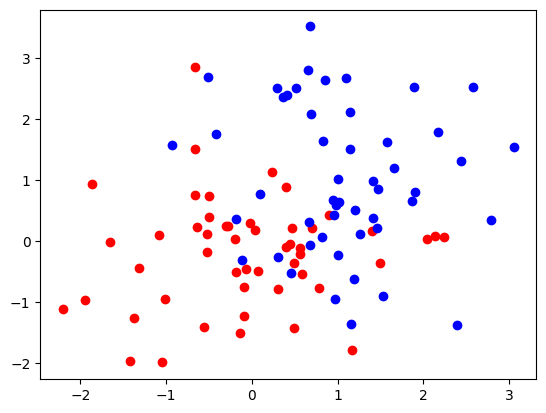

In [28]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

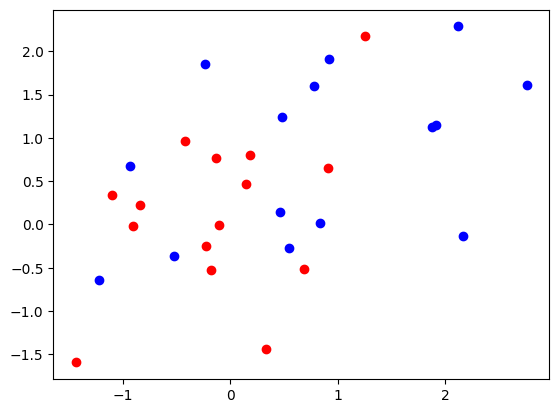

In [29]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [38]:
## TASK - 3
## The code given below is that of a KNN classifier, provided by Scikit-learn.
## The parameter 'metric' includes various distance metric options, including those
## we learnt above- manhattan, euclidean, minkowski,chebyshev, hamming, etc.

## Try out different metrics and observe changes in the accuracy, if any. Don't change value of 'k'
## Also, experiment with different metrics and observe if they are applicable for this kind of data.
## If there are any additional parameters needed, for instance, 'p' in case of Minkowski distance, include them.

knn = KNeighborsClassifier(n_neighbors = 3,metric='hamming')
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
50.0


### **SECTION - 2.2: KNN on a Real World dataset**

The Iris flower data set or Fisher's Iris data set is a multivariate data set that consists of 50 samples from each of three species of Iris (*Iris setosa, Iris virginica and Iris versicolor*). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [40]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [41]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [42]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [43]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [44]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [45]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



## **Homework Assignment: Exploring Distance Metrics and KNN**

---

### **Problem 1: Implementing Custom Distance Metrics**

In this exercise, you'll implement distance metrics from scratch to deepen your understanding.

**Task 1.1:** Implement the Minkowski distance formula without using any library functions (except basic numpy operations).

Recall that Minkowski distance is defined as:

$$d(x, x') = \left(\sum_{j=1}^{D} |x_j - x'_j|^p\right)^{1/p}$$

where $p$ is a parameter. When $p=1$, it's Manhattan distance, and when $p=2$, it's Euclidean distance.

In [46]:
## HOMEWORK TASK 1.1
## Implement the Minkowski distance function below
## Test it with p=1 (should match Manhattan) and p=2 (should match Euclidean)
## Expected number of lines: 3-5

def minkowski_distance(x1, x2, p):
    diff = np.abs(x1 - x2) ** p
    return np.sum(diff) ** (1 / p)

    pass

# Test your implementation
x_1 = np.array([1, 2, 3])
x_2 = np.array([4, 6, 8])

# Test with p=1 (Manhattan)
print("Minkowski distance (p=1):", minkowski_distance(x_1, x_2, 1))
print("Manhattan distance:", distance.cityblock(x_1, x_2))
print()

# Test with p=2 (Euclidean)
print("Minkowski distance (p=2):", minkowski_distance(x_1, x_2, 2))
print("Euclidean distance:", distance.euclidean(x_1, x_2))

Minkowski distance (p=1): 12.0
Manhattan distance: 12

Minkowski distance (p=2): 7.0710678118654755
Euclidean distance: 7.0710678118654755


---

### **Problem 2: Visualizing Decision Boundaries**

Understanding how KNN makes predictions is crucial. In this exercise, you'll visualize decision boundaries for different values of K.

**Task 2.1:** Create a function that visualizes the decision boundary of a KNN classifier on 2D data.

**Hint:** You'll need to:
1. Create a mesh grid covering the feature space
2. Train a KNN classifier
3. Predict the class for each point in the mesh
4. Plot the results using `plt.contourf()` for the decision boundary
5. Overlay the training data points

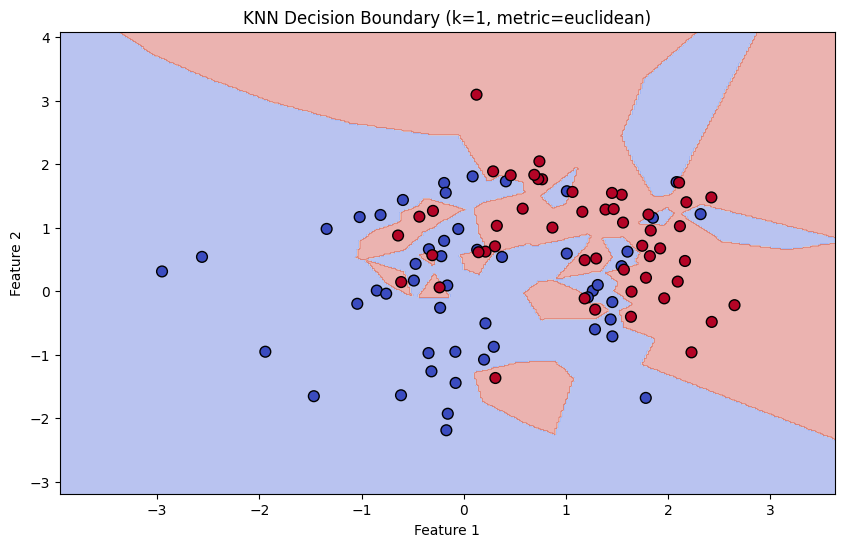

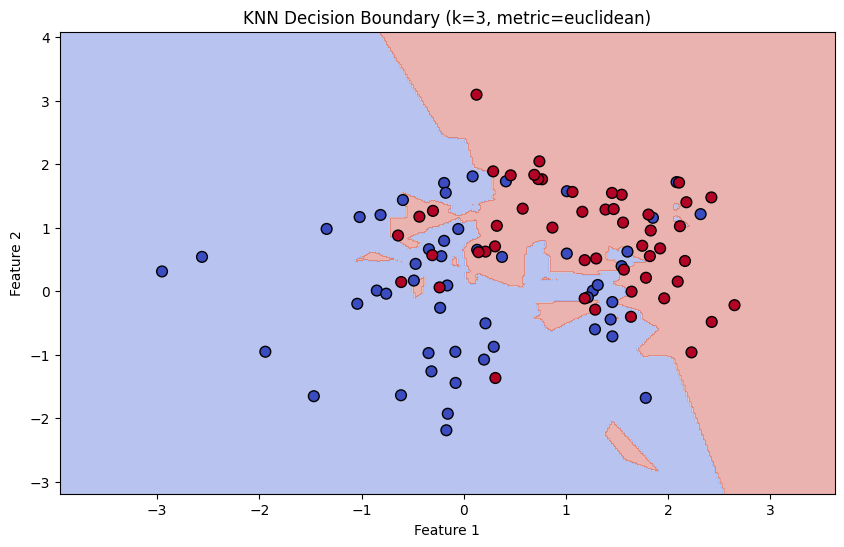

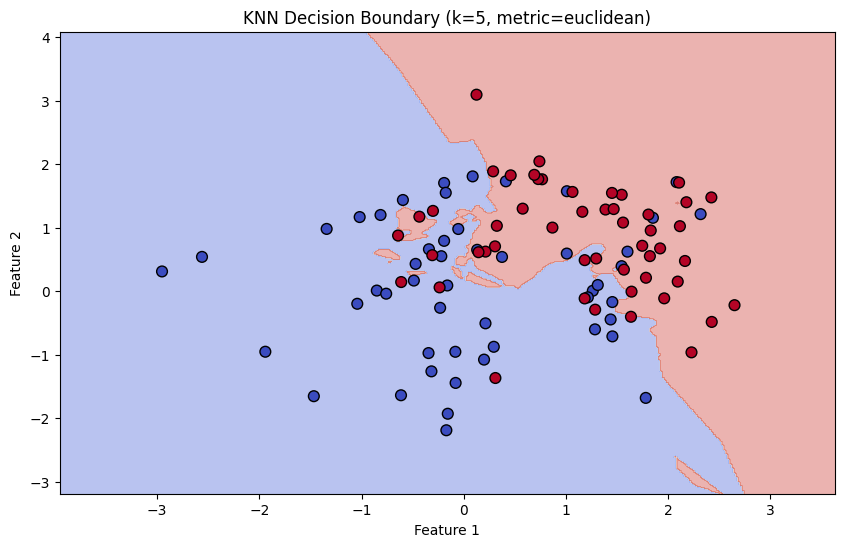

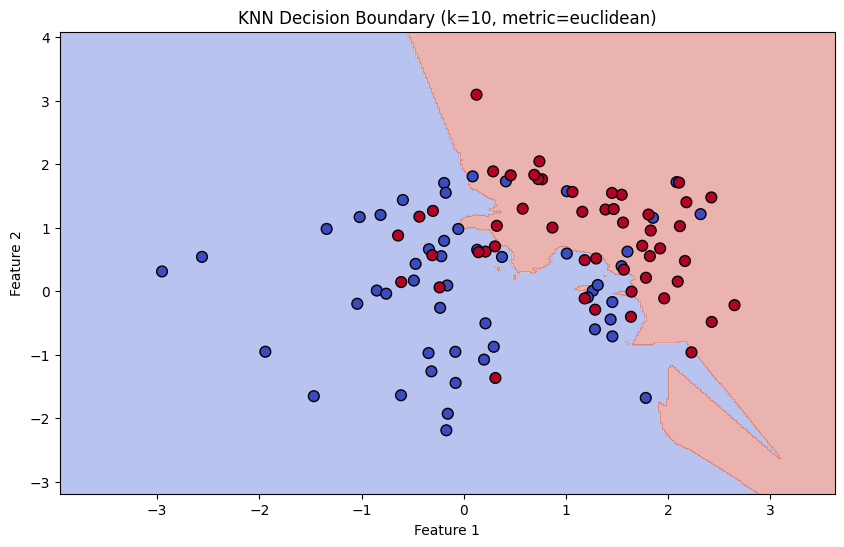

In [48]:
## HOMEWORK TASK 2.1
## Complete the function below to visualize KNN decision boundaries
## The function should create a mesh grid and predict class for each point

def plot_decision_boundary(X, y, k_value, metric='euclidean'):
    """
    Plot the decision boundary for KNN classifier.

    Parameters:
    X: Training data (n_samples, 2)
    y: Training labels
    k_value: Number of neighbors for KNN
    metric: Distance metric to use
    """
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    knn = KNeighborsClassifier(n_neighbors=k_value, metric=metric)
    knn.fit(X, y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Train KNN classifier
    # Write your code here to create and train KNN model

    # Predict for each point in mesh
    # Write your code here to make predictions

    # Plot decision boundary and training points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60, cmap='coolwarm')

    # Write your code here to plot contours and scatter points

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KNN Decision Boundary (k={k_value}, metric={metric})')
    plt.show()

# Generate synthetic data
n = 50
pts, tgts = generate_synth_data(n)

# Test with different k values
for k in [1, 3, 5, 10]:
    plot_decision_boundary(pts, tgts, k)

**Discussion Questions:**
1. What happens to the decision boundary as K increases? Is it smoother or more irregular?

As K increases, the decision boundary becomes smoother

2. Which K value seems to generalize better without overfitting?

Medium K values (like 3–7) usually generalize better and avoid overfitting.

3. Try changing the metric to 'manhattan' - how does the boundary change?

With Manhattan distance, the boundary becomes more box-shaped compared to Euclidean.

---

### **Problem 3: Impact of Distance Metrics on High-Dimensional Data**

The "curse of dimensionality" affects distance metrics differently. Let's explore this phenomenon.

**Task 3.1:** Create a function that generates random high-dimensional data and compares how different distance metrics behave as dimensionality increases.

**Background:** In high dimensions, the ratio between the maximum and minimum distances between points tends to approach 1, making it harder to distinguish between near and far neighbors. This affects different metrics differently.

In [55]:
def analyze_distance_in_high_dims(max_dim=50, n_points=100):
    """
    Analyze how distance metrics behave in high dimensions.

    Parameters:
    max_dim: Maximum dimensionality to test
    n_points: Number of random points to generate

    Returns:
    Dictionary with results for each metric
    """
    dimensions = range(2, max_dim+1, 5)
    results = {
        'euclidean': [],
        'manhattan': [],
        'chebyshev': []
    }

    for dim in dimensions:
        # Generate random points
        points = np.random.randn(n_points, dim)

        # Calculate all pairwise distances for each metric
        eu = distance.cdist(points, points, metric='euclidean')
        man = distance.cdist(points, points, metric='cityblock')
        che = distance.cdist(points, points, metric='chebyshev')

        eu = eu[eu > 0]
        man = man[man > 0]
        che = che[che > 0]

        # Store the ratio of max/min distance
        results['euclidean'].append(eu.max() / eu.min())
        results['manhattan'].append(man.max() / man.min())
        results['chebyshev'].append(che.max() / che.min())

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(list(dimensions), results['euclidean'], label='euclidean')
    plt.plot(list(dimensions), results['manhattan'], label='manhattan')
    plt.plot(list(dimensions), results['chebyshev'], label='chebyshev')
    plt.legend()
    plt.show()


    return results


---
### Questions to Think About and Answer:

1. How are similarity and distance different from each other?  

Distance measures how far apart two objects are ,larger value = more different.

Similarity measures how close or related two objects are ,larger value = more similar.


2. Are there any conditions for a particular distance to be considered a "distance metric"?
A function is a true distance metric only if it satisfies:

Non-negativity: distance ≥ 0

Identity: distance = 0 only if both points are identical

Symmetry: d(x, y) = d(y, x)






### Useful Resources for further reading
1.   [Analytics Vidhya: Distance metrics](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)
2.   [Scikit learn distance metric documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

